–ë—É–Ω–∫–æ–≤—Å–∫–∞—è –ê–Ω–Ω–∞
465304

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

–ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–π —ç—Ç–∞–ø
1. f(x) = x**3 - 2.5*(x**2) - 2*x
2. –≤–æ–∑—å–º–µ–º –ø—Ä–æ–º–µ–∂—É—Ç–æ–∫ [0, 4]
3. f(2) = -6, x=2 - –ª–æ–∫–∞–ª—å–Ω—ã–π –º–∏–Ω–∏–º—É–º
4. f(4) = 16 - max –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ
   f(2) = -6 - min –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–∞ –æ—Ç—Ä–µ–∑–∫–µ
5. –ú–µ—Ç–æ–¥ –∑–æ–ª–æ—Ç–æ–≥–æ —Å–µ—á–µ–Ω–∏—è
7. –ß–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è 0.1: 8


<ipython-input-6-b40090f2ac76>:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


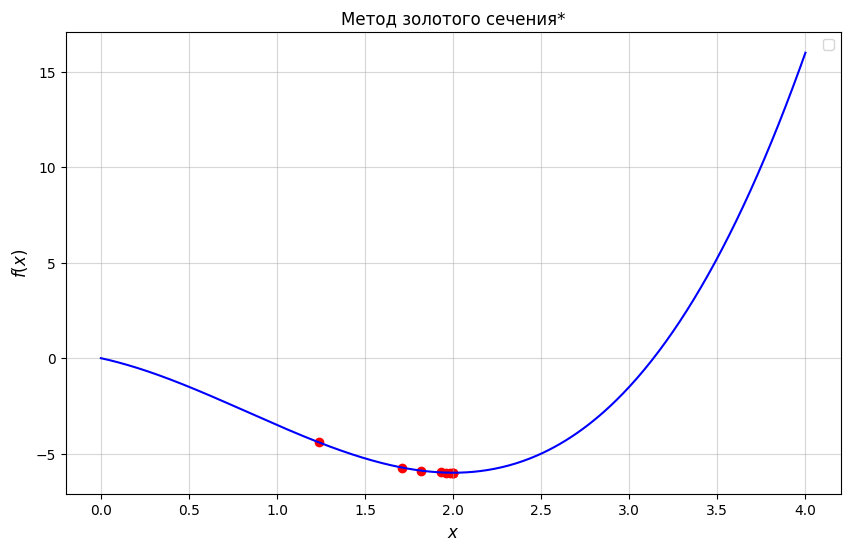

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:
–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞: x_min = 1.9837387624884393, f_min = -5.999078802465074
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞: x_max = 4, f_max = 16.0
–ß–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è 0.1: 8


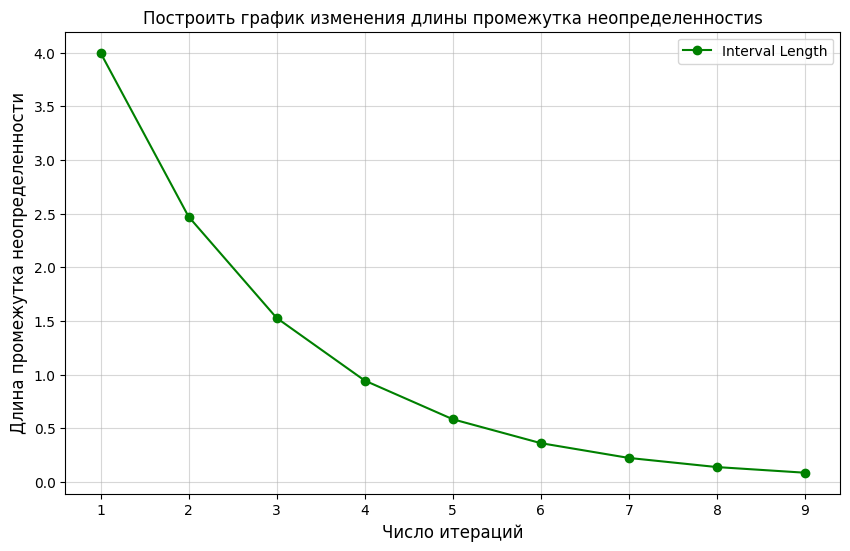

In [ ]:
def zolotoe_sechenie(f, a, b, tol=0.1):
    #interval - [a, b], f - —Ñ—É–Ω–∫—Ü–∏—è,
    resphi = (3 - np.sqrt(5)) / 2  # 1 / phi^2
    iterations = []

    y = a + resphi * (b - a)
    z = a + b - y
    fy = f(y)
    fz = f(z)

    while abs(b - a) > tol:
        iterations.append((a, b, (a + b) / 2))
        if fy <= fz:
            b = z
            z = y
            fz = fy
            y = a + b - y
            fy = f(y)
        else:
            a = y
            y = z
            fy = fz
            z = b + a - z
            fz = f(z)

    x_min = (a + b) / 2
    iterations.append((a, b, x_min))
    return x_min, iterations

def test_function(x):
    return x**3 - 2.5*(x**2) - 2*x

def find_extrema(f, a, b, tol=0.1):
    x_min, _ = zolotoe_sechenie(f, a, b, tol)
    f_min = test_function(x_min)
    f_a, f_b = test_function(a), test_function(b)
    extrema_type = "local minimum"
    x_max_candidates = [a, b, x_min]
    f_max_candidates = [f_a, f_b, f_min]
    max_index = np.argmax(f_max_candidates)
    x_max = x_max_candidates[max_index]
    f_max = f_max_candidates[max_index]

    return x_min, f_min, extrema_type, x_max, f_max

def calculate_iterations(a, b, tol):
    L0 = b - a
    phi = (1 + np.sqrt(5)) / 2
    N = np.ceil(np.log(tol / L0) / np.log(1 / phi))
    return int(N)

a0, b0 = 0, 4  # interval
tol = 0.1
x_min, iters = zolotoe_sechenie(test_function, a0, b0, tol)

#—Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫
interval_lengths = [b - a for a, b, _ in iters]
midpoints = [x for _, _, x in iters]
num_iterations = len(iters)

x = np.linspace(a0, b0, 500)
y = test_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')
for i, (_, _, x_mid) in enumerate(iters):
    plt.scatter(x_mid, test_function(x_mid), color='red')
plt.title("–ú–µ—Ç–æ–¥ –∑–æ–ª–æ—Ç–æ–≥–æ —Å–µ—á–µ–Ω–∏—è*")
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$f(x)$", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

x_min, f_min, extrema_type, x_max, f_max = find_extrema(test_function, a0, b0, tol)

print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:")
print(f"–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞: x_min = {x_min:}, f_min = {f_min:}")
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞: x_max = {x_max:}, f_max = {f_max:}")
print(f"–ß–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π –¥–ª—è {tol}: {calculate_iterations(a0, b0, tol)}")

# Plot the length of the uncertainty interval over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), interval_lengths, marker='o', color='green', label="Interval Length")
plt.title("–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è –¥–ª–∏–Ω—ã –ø—Ä–æ–º–µ–∂—É—Ç–∫–∞ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏s")
plt.xlabel("–ß–∏—Å–ª–æ –∏—Ç–µ—Ä–∞—Ü–∏–π", fontsize=12)
plt.ylabel("–î–ª–∏–Ω–∞ –ø—Ä–æ–º–µ–∂—É—Ç–∫–∞ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç–∏", fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∑–∞–¥–∞–Ω–∏—è:
–î–æ–∫–∞–∑–∞—Ç—å, —á—Ç–æ –≤—ã–±–æ—Ä —Ç–æ—á–µ–∫ –≤ –∞–ª–≥–æ—Ä–∏—Ç–º–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –æ–±—Ä–∞–∑—É–µ—Ç –∑–æ–ª–æ—Ç–æ–µ —Å–µ—á–µ–Ω–∏–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ—Å—Ç–∏ –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏.

–≠—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –∏–∑-–∑–∞ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è –∑–æ–ª–æ—Ç–æ–≥–æ —Å–µ—á–µ–Ω–∏—è
ùúô –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–≥–æ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —É0 (2 - —Ñ–∏)

–ù–∞–π—Ç–∏ –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –º–µ—Ç–æ–¥–∞ –∑–æ–ª–æ—Ç–æ–≥–æ —Å–µ—á–µ–Ω–∏—è.

–í—ã—á–µ—Å–ª–∏–º —É–∑–º–µ—Ä—è—è –¥–ª–∏–Ω—É –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –Ω–∞–∫–∞–∂–¥–æ–º —à–∞–≥–µ
–ü–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å —Å–≤—è–∑–∞–Ω–∞ —Å –¥–ª–∏–Ω–æ–π –∫–æ–Ω–µ—á–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ—Å—Ç–∏


In [ ]:
# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∑–∞–¥–∞–Ω–∏—è:

def verify_golden_ratio(iterations):
    """
    Verify that the ratio of the subintervals corresponds to the golden ratio on each iteration.
    """
    phi = (1 + np.sqrt(5)) / 2  # –∑–æ–ª–æ—Ç–æ–µ —Å–µ—á–µ–Ω–∏–µ
    ratios = []

    for a, b, x_mid in iterations:
        length = b - a
        sub_length_1 = x_mid - a
        sub_length_2 = b - x_mid
        ratio_1 = sub_length_1 / length
        ratio_2 = sub_length_2 / length
        ratios.append((ratio_1, ratio_2, abs(ratio_1 + ratio_2 - 1)))

    return ratios

golden_ratios = verify_golden_ratio(iters)
final_interval_length = iters[-1][1] - iters[-1][0]
final_error = final_interval_length / 2

print(f"–¥–ª–∏–Ω—ã –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞: {final_interval_length:.5e}")
print(f"–ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –≤ x_min: {final_error:.5e}")


–¥–ª–∏–Ω—ã –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞: 7.03576e-06
–ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å –≤ x_min: 3.51788e-06


–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é sin(x)


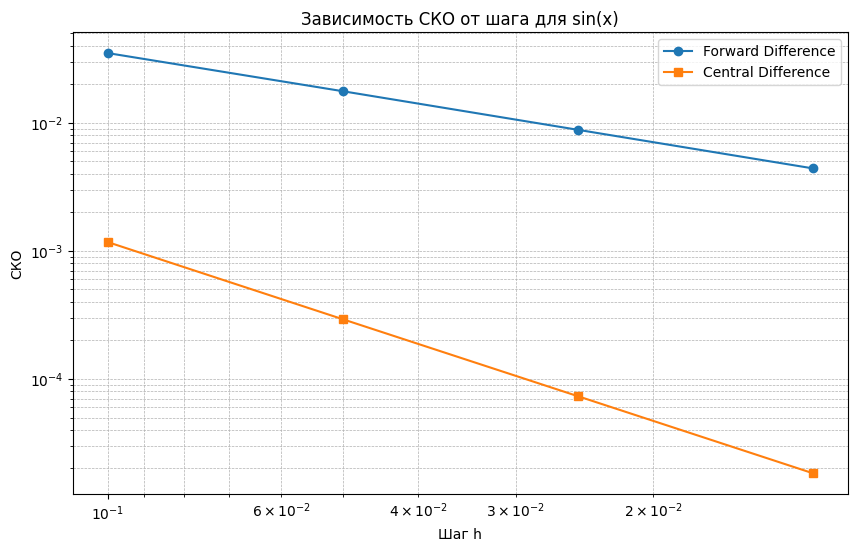

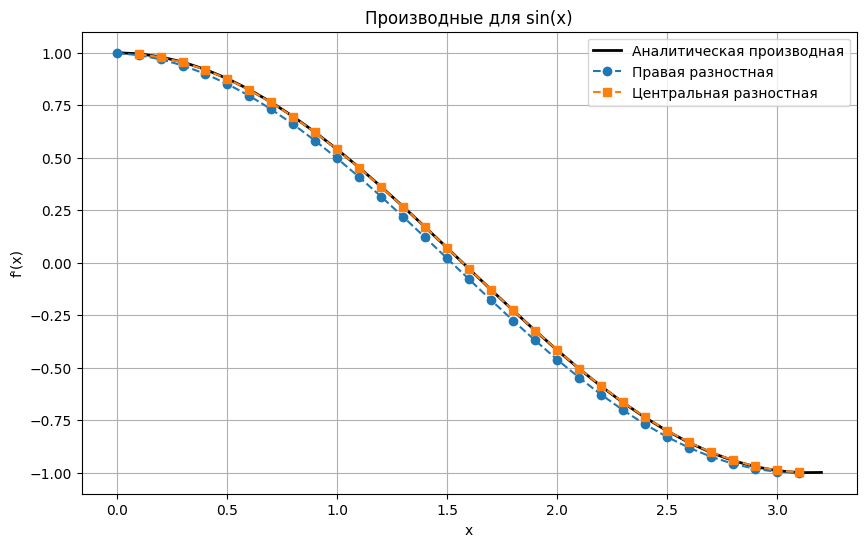

–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é exp(x)


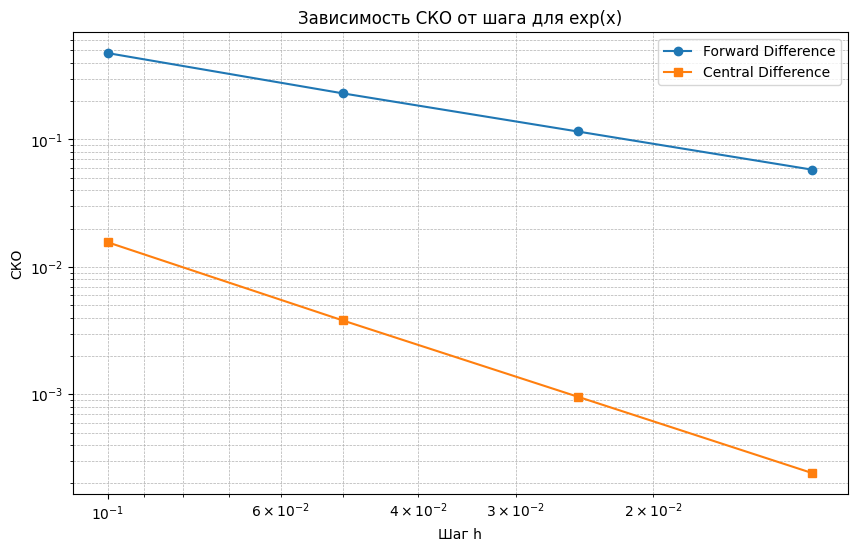

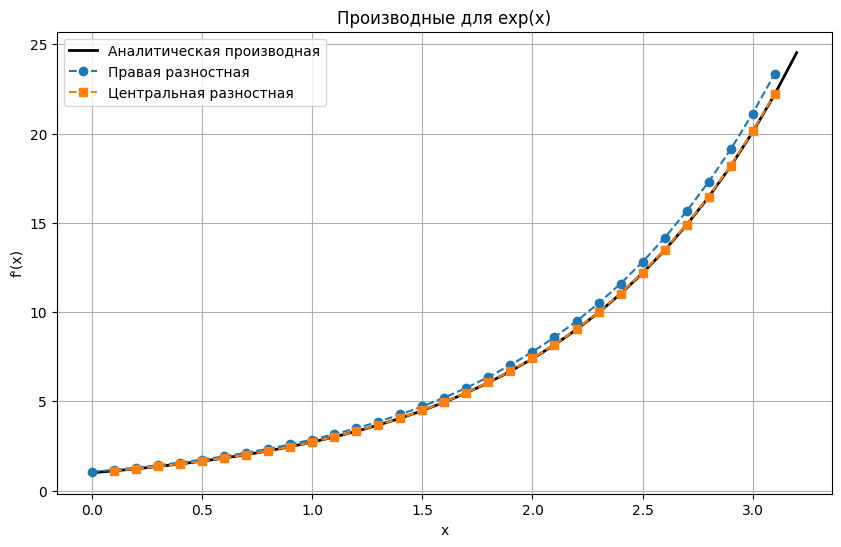

In [ ]:
def f1(x):
    return np.sin(x)

def f1_derivative(x):
    return np.cos(x)

def f2(x):
    return np.exp(x)

def f2_derivative(x):
    return np.exp(x)

# –ú–µ—Ç–æ–¥—ã —á–∏—Å–ª–µ–Ω–Ω–æ–≥–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏—è
def forward_difference(y, h):
    #–ü—Ä–∞–≤–∞—è —Ä–∞–∑–Ω–æ—Å—Ç–Ω–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è
    return (y[1:] - y[:-1]) / h

def backward_difference(y, h):
    #–õ–µ–≤–∞—è —Ä–∞–∑–Ω–æ—Å—Ç–Ω–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è
    return (y[1:] - y[:-1]) / h

def central_difference(y, h):
    #–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞—è —Ä–∞–∑–Ω–æ—Å—Ç–Ω–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è
    return (y[2:] - y[:-2]) / (2 * h)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –°–ö–û
def compute_rmse(true_values, numerical_values):
    return np.sqrt(np.mean((true_values - numerical_values) ** 2))


def main():
    a, b = 0, np.pi
    h_values = [0.1, 0.05, 0.025, 0.0125]  # –†–∞–∑–ª–∏—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —à–∞–≥–∞
    functions = [(f1, f1_derivative, "sin(x)"), (f2, f2_derivative, "exp(x)")]

    for f, f_derivative, label in functions:
        print(f"–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é {label}")

        rmse_forward = []
        rmse_central = []
        step_sizes = []

        for h in h_values:
            x = np.arange(a, b + h, h)
            y = f(x)
            true_derivative = f_derivative(x)
            forward = forward_difference(y, h)
            central = central_difference(y, h)
            forward_true = true_derivative[:-1]
            central_true = true_derivative[1:-1]

            rmse_forward.append(compute_rmse(forward_true, forward))
            rmse_central.append(compute_rmse(central_true, central))
            step_sizes.append(h)

        # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
        plt.figure(figsize=(10, 6))
        plt.loglog(step_sizes, rmse_forward, label="Forward Difference", marker="o")
        plt.loglog(step_sizes, rmse_central, label="Central Difference", marker="s")
        plt.gca().invert_xaxis()
        plt.xlabel("–®–∞–≥ h")
        plt.ylabel("–°–ö–û")
        plt.legend()
        plt.grid(True, linestyle="--", linewidth=0.5)
        plt.show()

        # –ì—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö
        h = h_values[0]
        x = np.arange(a, b + h, h)
        y = f(x)
        true_derivative = f_derivative(x)

        forward = forward_difference(y, h)
        central = central_difference(y, h)

        x_forward = x[:-1]
        x_central = x[1:-1]

        plt.figure(figsize=(10, 6))
        plt.plot(x, true_derivative, label="–ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è", color="black", linewidth=2)
        plt.plot(x_forward, forward, label="–ü—Ä–∞–≤–∞—è —Ä–∞–∑–Ω–æ—Å—Ç–Ω–∞—è", linestyle="--", marker="o")
        plt.plot(x_central, central, label="–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞—è —Ä–∞–∑–Ω–æ—Å—Ç–Ω–∞—è", linestyle="--", marker="s")
        plt.title(f"–ü—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ –¥–ª—è {label}")
        plt.xlabel("x")
        plt.ylabel("f'(x)")
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    main()
